In [1]:
#Local vs global curvature visualization of GVCL on toy examples
#this is part of Appendix A

import torch
import numpy as np
import matplotlib.pyplot as plt

device = 'cuda:0'

In [2]:
# def f(theta):
#     return torch.abs(theta)**1.6
# def f(theta):
#     return 1 * (torch.abs(theta)**0.25)
# def f(theta):
#     return ((torch.abs(theta)-0.5)**3 + 0.4)**(1/3)

In [3]:
betas = [0.1, 1, 10]

In [4]:
def run_vi(f):
    X = np.random.normal(0, 1, [1000])

    x_cuda = torch.from_numpy(X).to(device)
    sigma_0 = 30

    end_mus = []
    end_lvs =[]
    
    for beta in betas:
        mu = torch.nn.Parameter(torch.from_numpy(np.random.normal(0, 0.1, [1])).to(device), requires_grad = True)
        log_var = torch.nn.Parameter((-3*torch.ones(1)).to(device), requires_grad = True)

        optim = torch.optim.Adam([mu, log_var], lr = 1e-2)
        for e in range(5000):
            optim.zero_grad()
            n_theta_samples = 1000
            theta_samples = mu + torch.exp(0.5 * log_var) * torch.empty([n_theta_samples],device = device).normal_()
            mean_samples = f(theta_samples)
            lp_D_theta = -torch.mean(torch.sum((mean_samples.view(-1, 1) - x_cuda.view(1, -1))**2,1), 0)/(2*sigma_0)
            kl = 0.5 * (mu**2 +torch.exp(log_var) - 1 - log_var)
            loss = beta * kl - lp_D_theta
            loss.backward()
            optim.step()

        end_mus.append(mu)
        end_lvs.append(log_var)
        
        test_theta = torch.from_numpy(np.linspace(-3, 3, 10000)).to(device)
        lp_D_theta_range = -torch.sum((f(test_theta).view(-1, 1) - x_cuda.view(1, -1))**2,1)/(2*sigma_0)
    
    
    return end_mus, end_lvs, test_theta, lp_D_theta_range

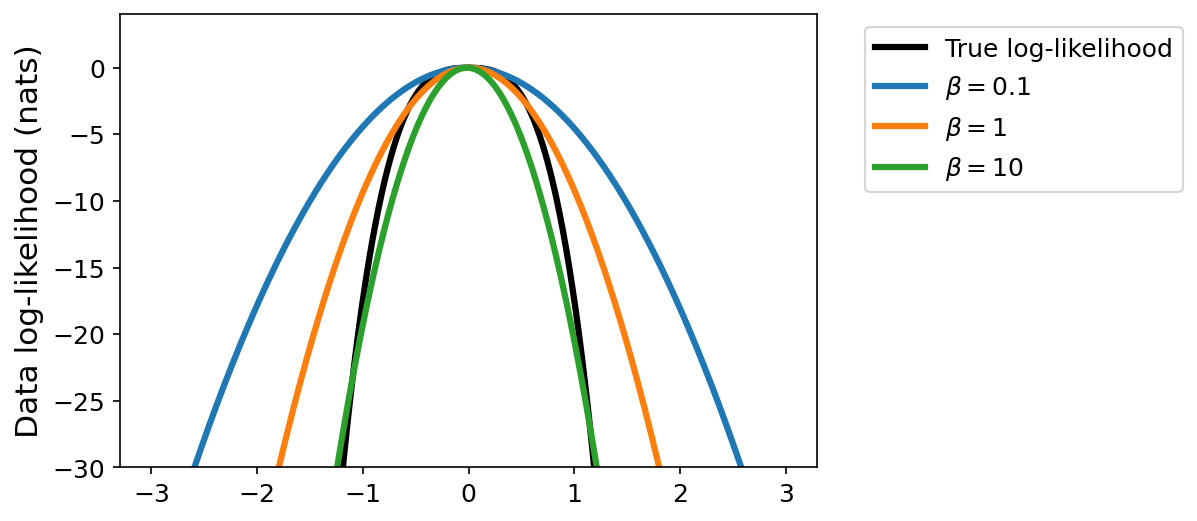

In [5]:
#plot 1

def f1(theta):
    return torch.abs(theta)**1.6

end_mus, end_lvs, test_theta, lp_D_theta_range = run_vi(f1)

plt.figure(dpi = 150)
plt.plot(test_theta.cpu().numpy(), lp_D_theta_range.cpu().numpy() - np.max(lp_D_theta_range.cpu().numpy()), c= 'k', linewidth = 3)
for beta, m, lv in zip(betas, end_mus, end_lvs):
    H_tilde = 1/(beta*(torch.exp(-lv) - 1))
    posterior_lik = -(test_theta-m)**2/(2*H_tilde)
    
    #comment out this line to show just the true LL
    plt.plot(test_theta.cpu().numpy(), posterior_lik.detach().cpu().numpy() - np.max(posterior_lik.detach().cpu().numpy()), linewidth = 3)
plt.ylim(-30, 4)
plt.xlabel(r'$\theta$')
plt.xlabel('')
plt.tick_params(which = 'both', labelsize = 12)
plt.ylabel('Data log-likelihood (nats)', fontsize = 15)
plt.legend(['True log-likelihood'] + [r'$\beta=' + str(b) + r'$' for b in betas], fontsize = 12, bbox_to_anchor=(1.05, 1))

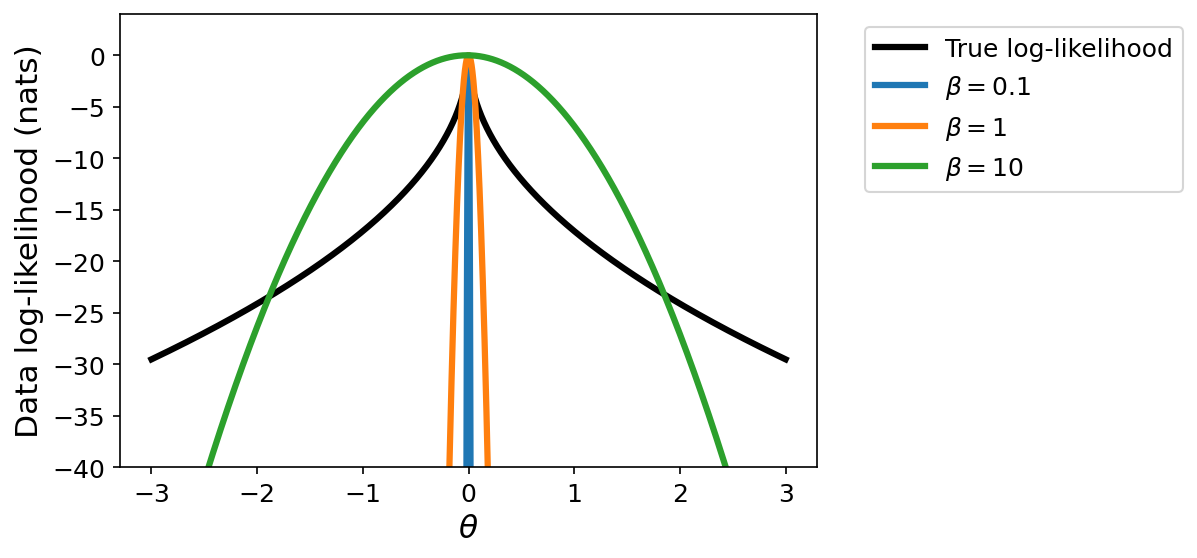

In [8]:
#plot 2

def f2(theta):
    return 1 * (torch.abs(theta)**0.25)

end_mus, end_lvs, test_theta, lp_D_theta_range = run_vi(f2)

plt.figure(dpi = 150)
plt.plot(test_theta.cpu().numpy(), lp_D_theta_range.cpu().numpy() - np.max(lp_D_theta_range.cpu().numpy()), c= 'k', linewidth = 3)
for beta, m, lv in zip(betas, end_mus, end_lvs):
    H_tilde = 1/(beta*(torch.exp(-lv) - 1))
    posterior_lik = -(test_theta-m)**2/(2*H_tilde)
    
    #comment out this line to show just the true LL
    plt.plot(test_theta.cpu().numpy(), posterior_lik.detach().cpu().numpy() - np.max(posterior_lik.detach().cpu().numpy()), linewidth = 3)
plt.ylim(-40, 4)
plt.xlabel(r'$\theta$', fontsize = 15)
plt.tick_params(which = 'both', labelsize = 12)
plt.ylabel('Data log-likelihood (nats)', fontsize = 15)
plt.legend(['True log-likelihood'] + [r'$\beta=' + str(b) + r'$' for b in betas], fontsize = 12, bbox_to_anchor=(1.05, 1))

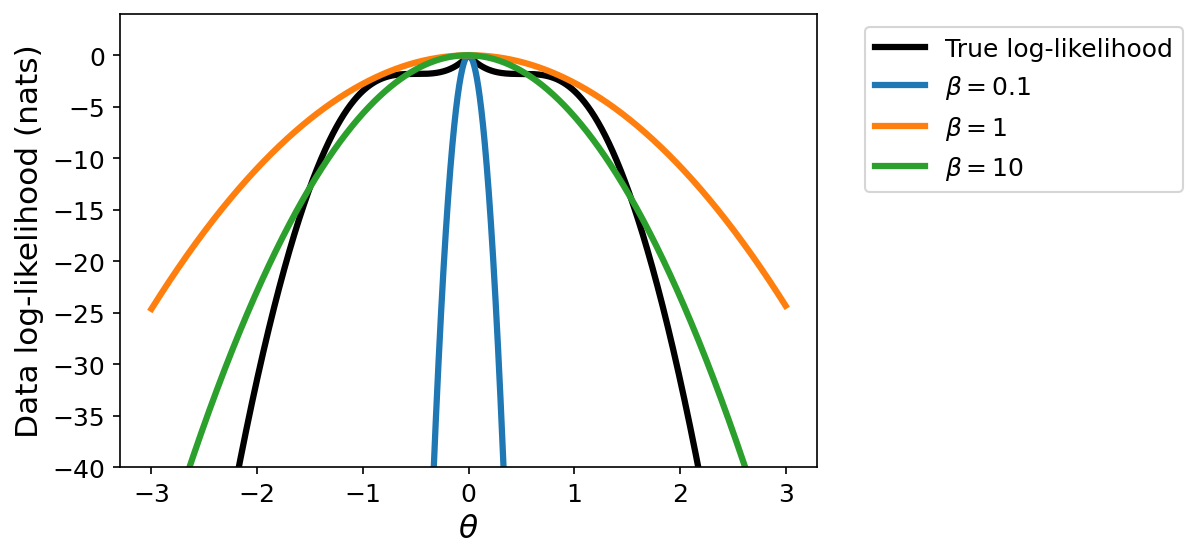

In [9]:
#plot 3

def f3(theta):
    return ((torch.abs(theta)-0.5)**3 + 0.4)**(1/3)

end_mus, end_lvs, test_theta, lp_D_theta_range = run_vi(f3)

plt.figure(dpi = 150)
plt.plot(test_theta.cpu().numpy(), lp_D_theta_range.cpu().numpy() - np.max(lp_D_theta_range.cpu().numpy()), c= 'k', linewidth = 3)
for beta, m, lv in zip(betas, end_mus, end_lvs):
    H_tilde = 1/(beta*(torch.exp(-lv) - 1))
    posterior_lik = -(test_theta-m)**2/(2*H_tilde)
    
    #comment out this line to show just the true LL
    plt.plot(test_theta.cpu().numpy(), posterior_lik.detach().cpu().numpy() - np.max(posterior_lik.detach().cpu().numpy()), linewidth = 3)
plt.ylim(-40, 4)
plt.xlabel(r'$\theta$', fontsize = 15)
plt.tick_params(which = 'both', labelsize = 12)
plt.ylabel('Data log-likelihood (nats)', fontsize = 15)
plt.legend(['True log-likelihood'] + [r'$\beta=' + str(b) + r'$' for b in betas], fontsize = 12, bbox_to_anchor=(1.05, 1))